In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# test normalisation et impact

# Attention lorsque l'on normalise les séries temporelles sur 100% il ne faut plus penser en terme de temps
# les mesures de durées ne sont plus bonnes mais il faut réfléchir en terme de % de la phase d'appui respective et multiplier 
# par le temps de la phase d'appui si on veut retrouver le temps respectifs

VerticalGrfRight = np.random.randint(0,79,(79,))
VerticalGrfLeft = np.random.randint(0,79,(48,))

XVerticalGrfRight = np.linspace(0,len(VerticalGrfRight),len(VerticalGrfRight))
XVerticalGrfLeft = np.linspace(0,len(VerticalGrfLeft),len(VerticalGrfLeft))
DataFrameVerticalGrfRight = pd.DataFrame({'xR':XVerticalGrfRight,'yR':VerticalGrfRight})
DataFrameVerticalGrfLeft = pd.DataFrame({'xL':XVerticalGrfLeft,'yL':VerticalGrfLeft})
DataFrameVerticalGrfRight['xnorm']=DataFrameVerticalGrfRight['xR'] * 100 / DataFrameVerticalGrfRight['xR'][len(DataFrameVerticalGrfRight)-1]
DataFrameVerticalGrfLeft['xnorm']=DataFrameVerticalGrfLeft['xL'] * 100 / DataFrameVerticalGrfLeft['xL'][len(DataFrameVerticalGrfLeft)-1]

plt.subplot(2,1,1)
plt.plot(DataFrameVerticalGrfLeft['yL'])
plt.plot(DataFrameVerticalGrfRight['yR'])
plt.subplot(2,1,2)
plt.plot(DataFrameVerticalGrfLeft['xnorm'],DataFrameVerticalGrfLeft['yL'])
plt.plot(DataFrameVerticalGrfRight['xnorm'],DataFrameVerticalGrfRight['yR'])




In [ ]:
x = np.linspace(1,52,52) 
y_vertical_d = [0,10,20,40,60,40,30,40,60,40,20,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,10,20,30,20,15,20,30,20,10,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#y_vertical_d = [0,1,2,4,6,4,3,4,6,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,6,4,3,4,6,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_antpost_d = [0,-1,-2,-3,-2,-1,0,1,2,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-2,-3,-2,-1,0,1,2,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_vertical_g = [0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,6,4,3,4,6,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,6,4,3,4,6,4,2,1,0,0,0]
y_antpost_g = [0,0,0,0,0,0,0,0,0,0,0,0,-1,-2,-3,-2,-1,0,1,2,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-2,-3,-2,-1,0,1,2,3,2,1,0,0,0]

plt.subplot(2,1,1)
plt.plot(x, y_vertical_d, c='b')
plt.plot(x, y_vertical_g, c='r')
plt.subplot(2,1,2)
plt.plot(x, y_antpost_d, c='b')
plt.plot(x, y_antpost_g, c='r')

In [ ]:
from MakeDictStep import MakeDictStep
VerticalGrfStepRight, ApGrfStepRight = MakeDictStep(y_vertical_d, y_antpost_d)
VerticalGrfStepLeft, ApGrfStepLeft = MakeDictStep(y_vertical_g, y_antpost_g)

Tresfold = [5] * len(VerticalGrfStepLeft[0])
xdt = VerticalGrfStepRight[0]
xgt = VerticalGrfStepLeft[0]
VerticalGrfAsym = []
conditionfill = []
rangexdt = 1
rangexgt = 1
for i in range(0,len(VerticalGrfStepLeft[0])):
       VerticalGrfAsym.append(2*(xdt[i]-xgt[i])/(rangexdt+rangexgt))
       conditionfill.append(VerticalGrfAsym[i] > Tresfold[i])

plt.figure(figsize=(15,8))
plt.plot(VerticalGrfStepRight[0], c='b', ls='--', label='Jambe gauche')
plt.plot(VerticalGrfStepLeft[0], c='r', ls='--', label='Jambe droite')
plt.scatter(x=range(0,len(VerticalGrfStepRight[0])), y = VerticalGrfStepRight[0], c='b')
plt.scatter(x=range(0,len(VerticalGrfStepLeft[0])), y = VerticalGrfStepLeft[0], c='r')
plt.plot(VerticalGrfAsym, c='black', label = 'Fonction de Symétrie Dynamique')
plt.hlines(y = 5, xmin=0, xmax=13, colors='black', lw=0.5, ls='--', label='5% Tresfold')
plt.fill_between(x=range(0,len(VerticalGrfStepLeft[0])), y1 = 5, y2 = VerticalGrfAsym, where = conditionfill, alpha = 0.2, color = 'r')
plt.legend()

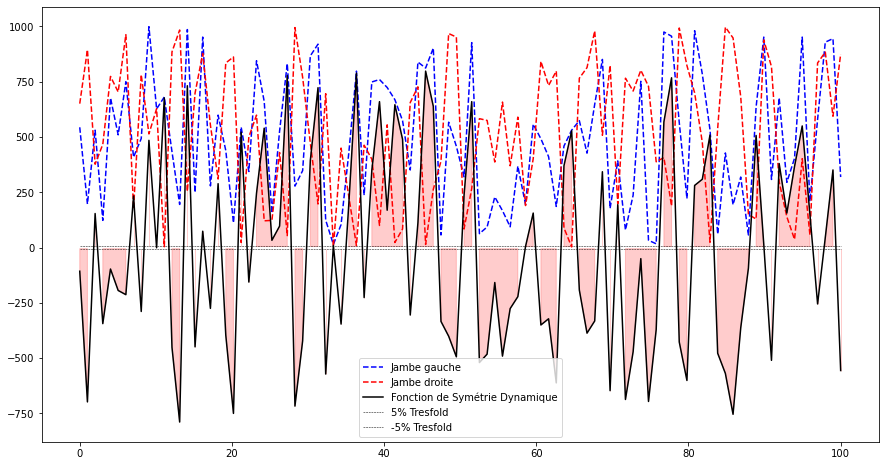

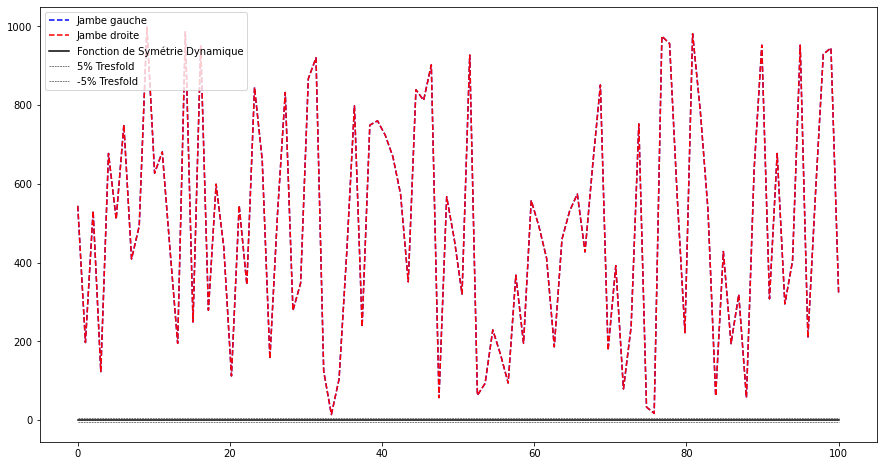

In [5]:
from DynamicSymetryFunctionProcedure import PlotDynamicSymetryFunction
VerticalGrfRight = np.random.randint(0,1000,(100,))
VerticalGrfLeft = np.random.randint(0,1000,(100,))
PlotDynamicSymetryFunction(VerticalGrfRight, VerticalGrfLeft)
PlotDynamicSymetryFunction(VerticalGrfRight, VerticalGrfRight)


In [4]:
from GetGrfValues import GetGrfValues
GrfValuesLeft = GetGrfValues(y_vertical_g, y_antpost_g)
GrfValuesRight = GetGrfValues(y_vertical_d, y_antpost_d)

In [5]:
from DynamicSymetryFunctionProcedure import DynamicSymetryFunctionProcedure
DynamicSymetryFunctionProcedure(GrfValuesLeft, GrfValuesRight)

,FirtPeak,MidstanceValley,SecondPeak,FirtPeakTimeTo,MidstanceValleyTimeTo,SecondPeakTimeTo,TimeFromMidstanceValleyToToeOff,FirtAndMidstanceImpulse,SecondAndPreswingImpulse,TotalVerticalGrfImpulse,BrakingPeak,PropulsivePeak,BrakePhaseDuration,PropulsivePhaseDuration,BrakePhaseTimeTo,PropulsivePhaseTimeTo,BrakingImpulse,PropulsiveImpulse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
